In [1]:
import geopandas as gpd
import geoplot as gplt
import pandas as pd
from shapely.geometry import box
import matplotlib.pyplot as plt

In [2]:
indonesia_boundary = gpd.read_file('input/IDN.json')
indonesia_boundary.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   GID_1      34 non-null     object  
 1   GID_0      34 non-null     object  
 2   COUNTRY    34 non-null     object  
 3   NAME_1     34 non-null     object  
 4   VARNAME_1  34 non-null     object  
 5   NL_NAME_1  34 non-null     object  
 6   TYPE_1     34 non-null     object  
 7   ENGTYPE_1  34 non-null     object  
 8   CC_1       34 non-null     object  
 9   HASC_1     34 non-null     object  
 10  ISO_1      34 non-null     object  
 11  geometry   34 non-null     geometry
dtypes: geometry(1), object(11)
memory usage: 3.3+ KB


In [3]:
property_df = pd.read_csv('input/properties.csv')
property_df.dropna(subset=['latitude', 'longitude'], inplace=True)
property_gdf = gpd.GeoDataFrame(property_df, geometry=gpd.points_from_xy(property_df.longitude, property_df.latitude))
property_gdf.dropna(subset=['geometry'], inplace=True)
property_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 19160 entries, 0 to 19159
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   latitude   19160 non-null  float64 
 1   longitude  19160 non-null  float64 
 2   geometry   19160 non-null  geometry
dtypes: float64(2), geometry(1)
memory usage: 598.8 KB


In [4]:
property_gdf.head()

,latitude,longitude,geometry
0,-8.820627,115.162414,POINT (115.16241 -8.82063)
1,-7.984610,112.673427,POINT (112.67343 -7.98461)
2,-7.849212,110.308785,POINT (110.30879 -7.84921)
3,-7.759357,112.190140,POINT (112.19014 -7.75936)
4,-7.354549,112.593898,POINT (112.59390 -7.35455)


/home/hengky/.pyenv/versions/3.11.6/envs/pashouses-python-for-spatial-data-01/lib/python3.11/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<Axes: >

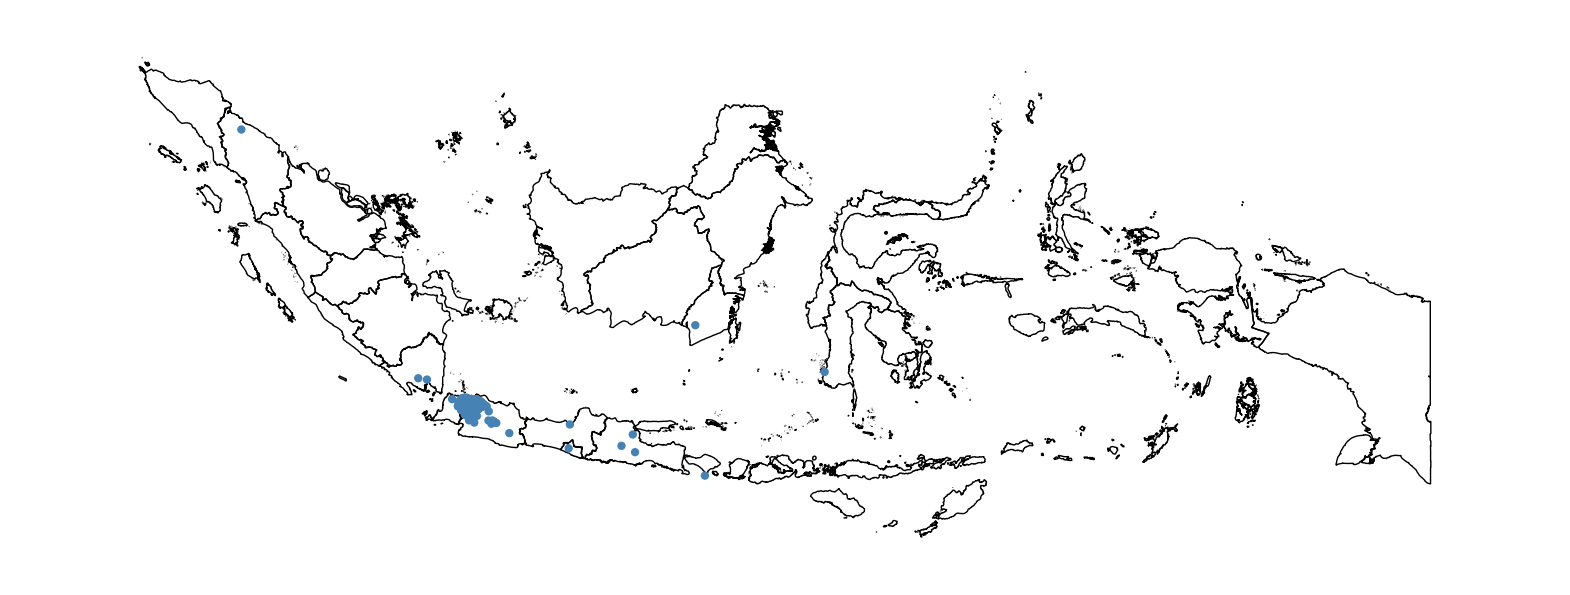

In [5]:
ax = gplt.pointplot(property_gdf, figsize=(20, 20))
gplt.polyplot(indonesia_boundary, ax=ax)

In [6]:
minx, miny, maxx, maxy = 106.875, -7.01366792756663, 107.2265625, -6.664607562172579
bbox = box(minx, miny, maxx, maxy)

In [7]:
intersects_or_within_gdf = indonesia_boundary[indonesia_boundary.intersects(bbox) | indonesia_boundary.within(bbox)]
intersects_or_within_gdf.head()

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
8,IDN.9_1,IDN,Indonesia,JawaBarat,NA,NA,Propinisi,Province,32,ID.JR,ID-JB,"MULTIPOLYGON (((108.13310 -7.78340, 108.08960 ..."


(106.24744, 108.95696, -7.918775, -5.818325)

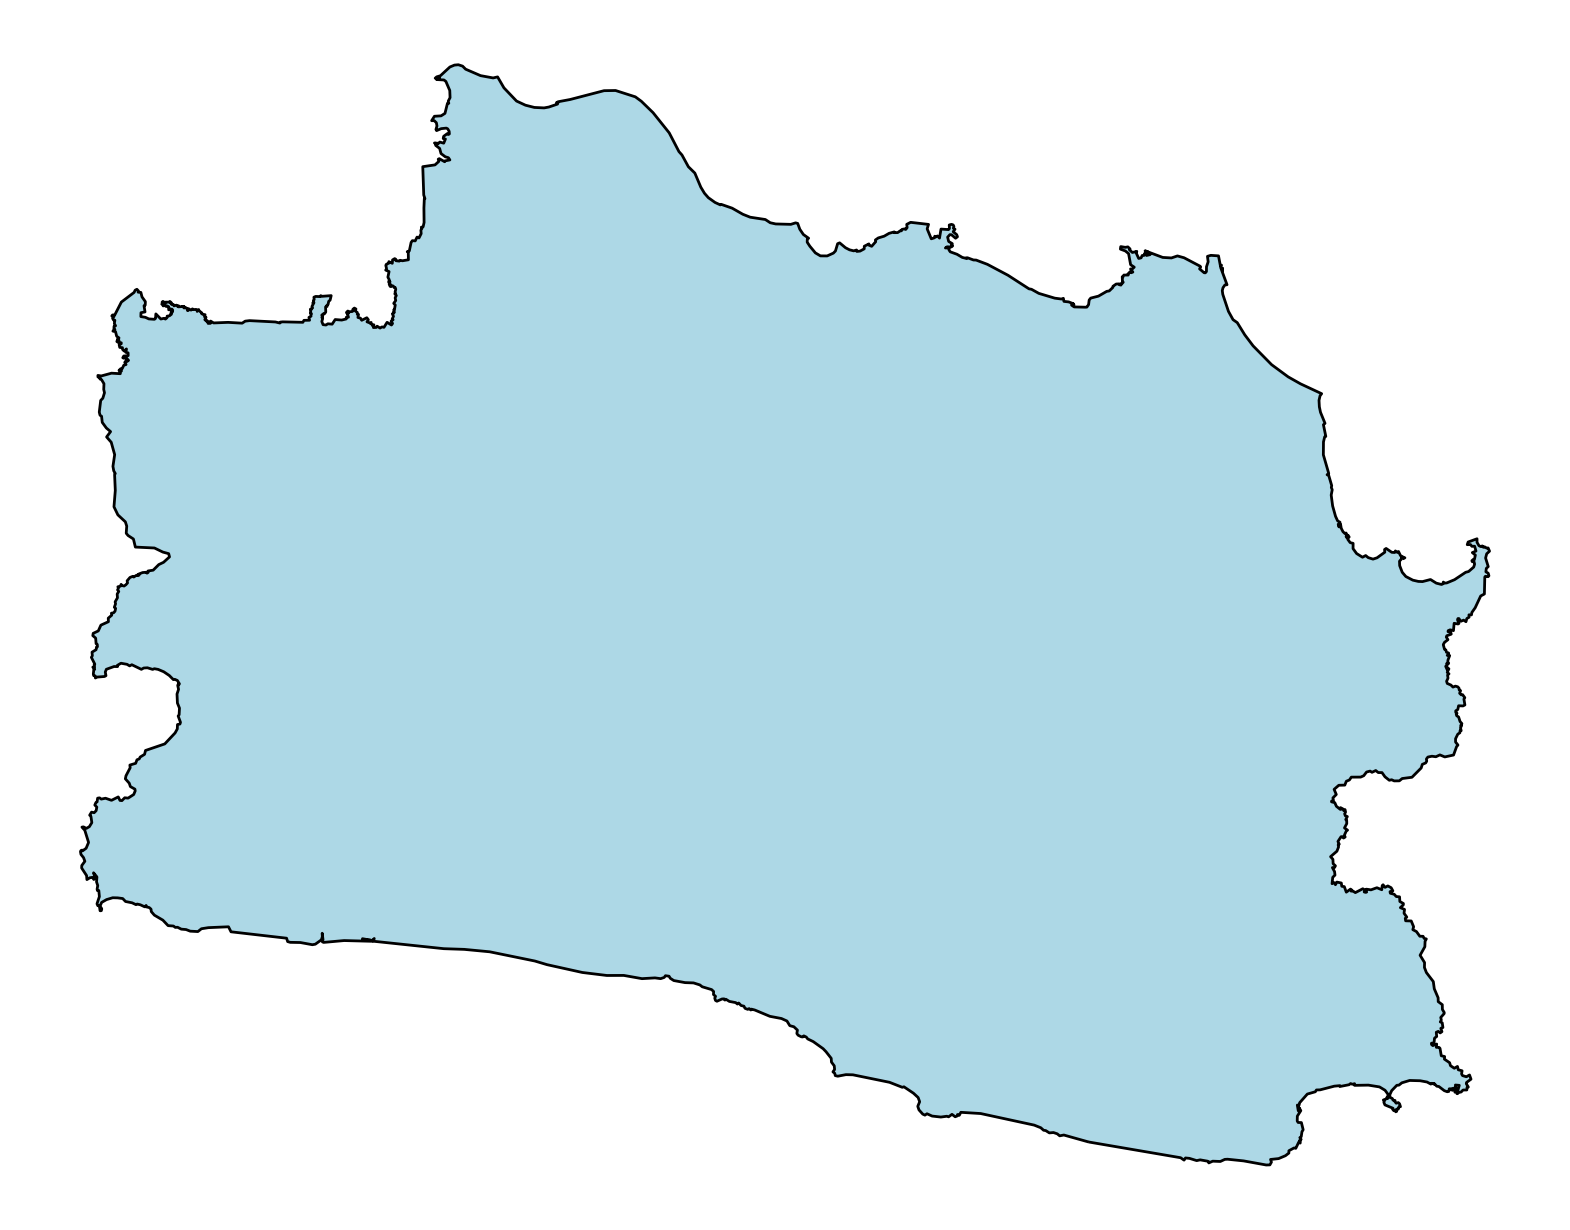

In [8]:

ax = intersects_or_within_gdf.plot(figsize=(20, 20), edgecolor='black', linewidth=2, color='lightblue')
ax.axis('off')

In [9]:
property_in_intersects_or_within_gdf = gpd.sjoin(property_gdf, intersects_or_within_gdf, how='inner', op='within')
property_in_intersects_or_within_gdf.info()

/home/hengky/.pyenv/versions/3.11.6/envs/pashouses-python-for-spatial-data-01/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3488: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/tmp/ipykernel_184766/1136865416.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  property_in_intersects_or_within_gdf = gpd.sjoin(property_gdf, intersects_or_within_gdf, how='inner', op='within')


<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 11743 entries, 5 to 19095
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   latitude     11743 non-null  float64 
 1   longitude    11743 non-null  float64 
 2   geometry     11743 non-null  geometry
 3   index_right  11743 non-null  int64   
 4   GID_1        11743 non-null  object  
 5   GID_0        11743 non-null  object  
 6   COUNTRY      11743 non-null  object  
 7   NAME_1       11743 non-null  object  
 8   VARNAME_1    11743 non-null  object  
 9   NL_NAME_1    11743 non-null  object  
 10  TYPE_1       11743 non-null  object  
 11  ENGTYPE_1    11743 non-null  object  
 12  CC_1         11743 non-null  object  
 13  HASC_1       11743 non-null  object  
 14  ISO_1        11743 non-null  object  
dtypes: float64(2), geometry(1), int64(1), object(11)
memory usage: 1.4+ MB


/home/hengky/.pyenv/versions/3.11.6/envs/pashouses-python-for-spatial-data-01/lib/python3.11/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<Axes: xlabel='None', ylabel='None'>

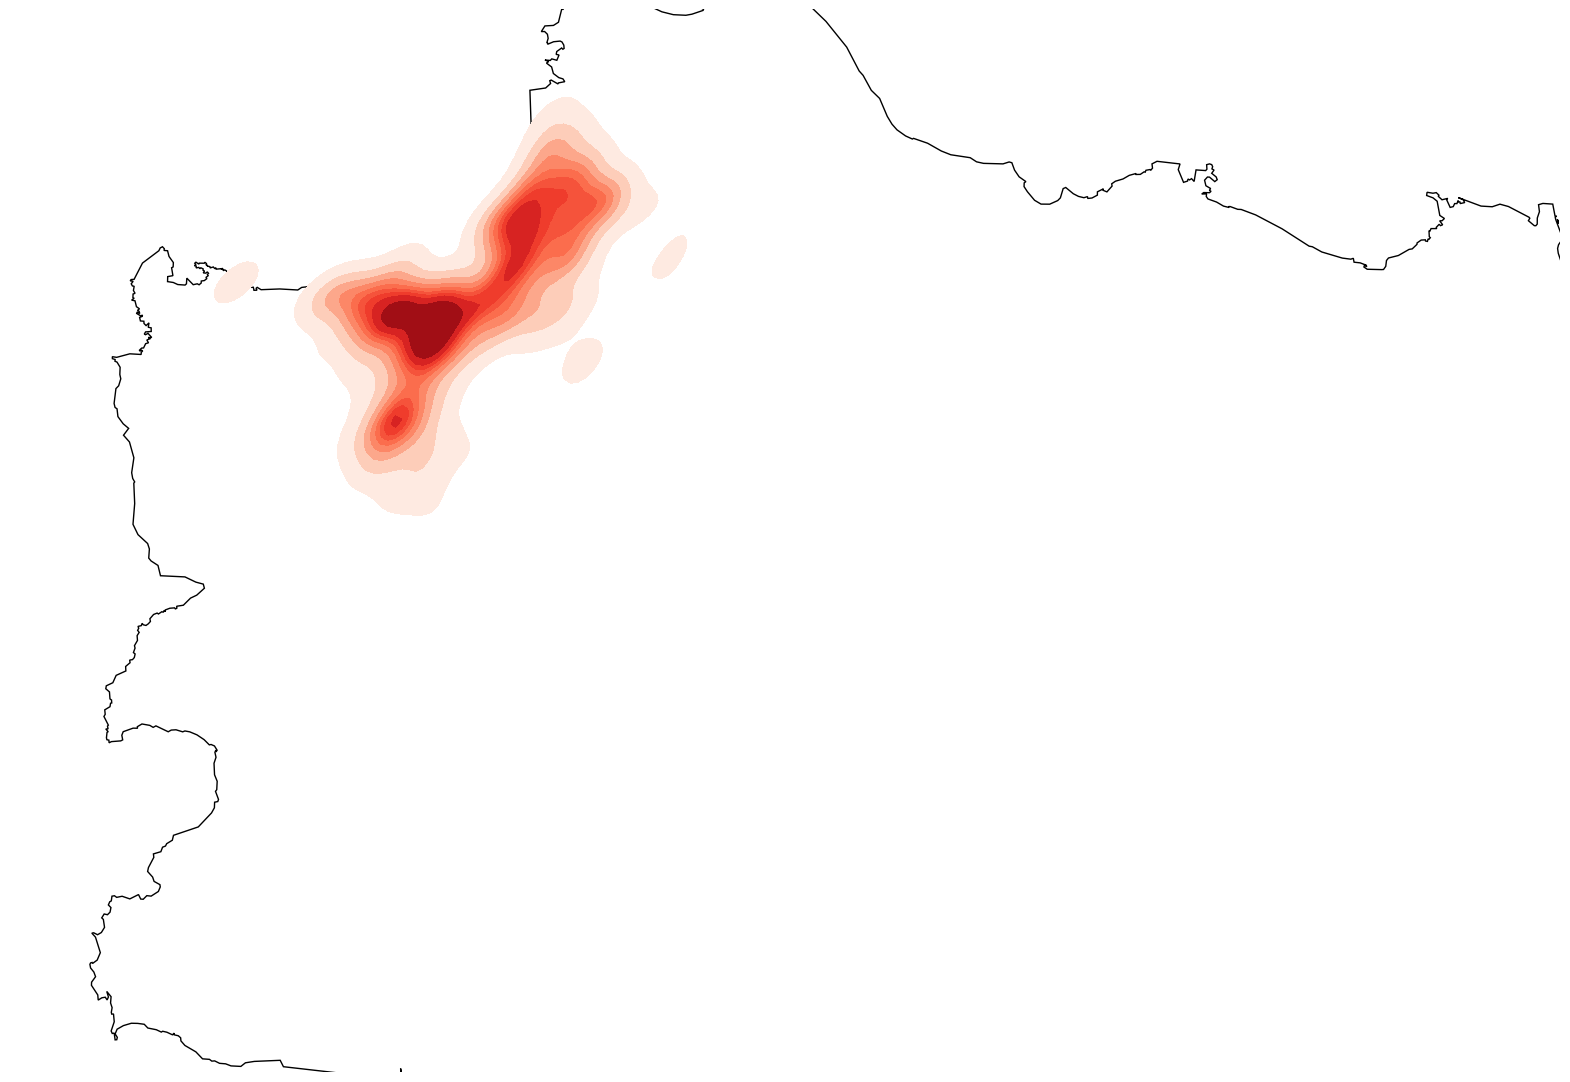

In [10]:
ax = gplt.polyplot(intersects_or_within_gdf, figsize=(20, 20))
gplt.kdeplot(property_in_intersects_or_within_gdf, fill=True, cmap='Reds', ax=ax)

/home/hengky/.pyenv/versions/3.11.6/envs/pashouses-python-for-spatial-data-01/lib/python3.11/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<Axes: xlabel='None', ylabel='None'>

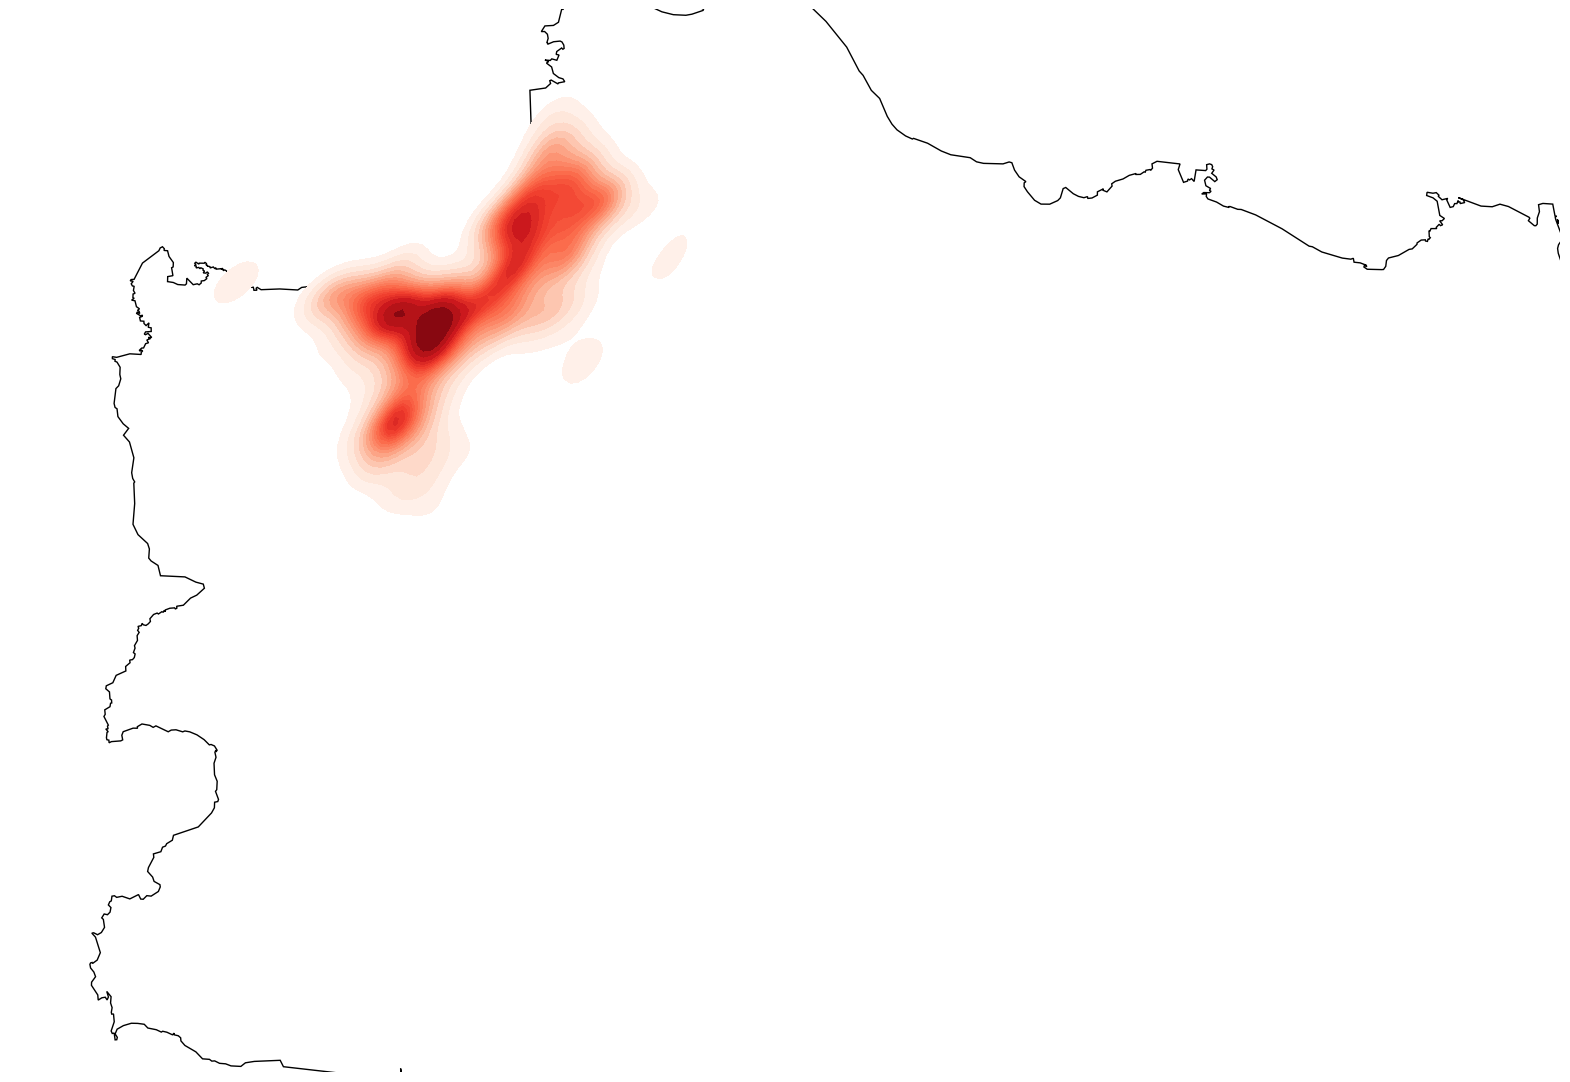

In [11]:
ax = gplt.polyplot(intersects_or_within_gdf, figsize=(20, 20))
gplt.kdeplot(property_in_intersects_or_within_gdf, fill=True, cmap='Reds', n_levels=20, ax=ax)

/home/hengky/.pyenv/versions/3.11.6/envs/pashouses-python-for-spatial-data-01/lib/python3.11/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:
/home/hengky/.pyenv/versions/3.11.6/envs/pashouses-python-for-spatial-data-01/lib/python3.11/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


(106.26193719999999, 108.3698668, -7.42580062, -5.9805731799999995)

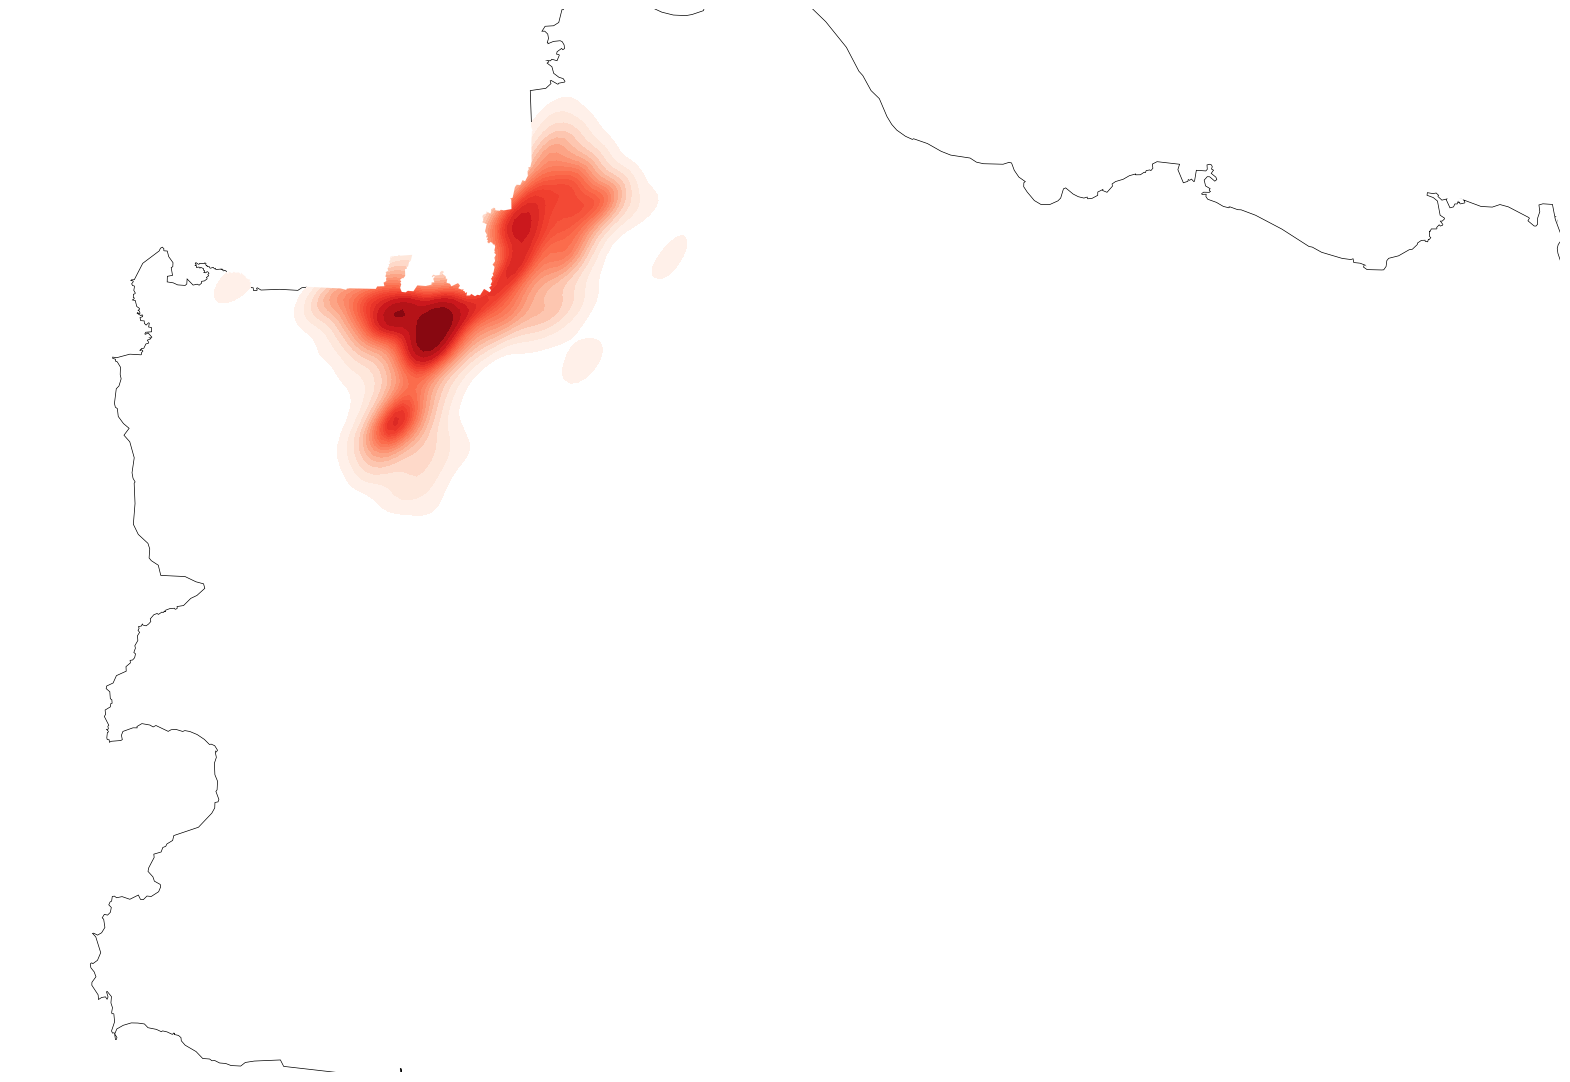

In [12]:
ax = gplt.polyplot(intersects_or_within_gdf, figsize=(20, 20))
gplt.kdeplot(property_in_intersects_or_within_gdf, fill=True, cmap='Reds', n_levels=20, clip=intersects_or_within_gdf.geometry, ax=ax)
ax.axis('off')